# ISLR- Python: Ch3 -- Applied Question 13

- [Generate Simulated Data and Fit Linear Model](#Generate-Simulated-Data-and Fit Linear Model)
- [Fit Quadratic Model to Simulated Data](#Fit-Quadratic-Model-to-Simulated-Data)
- [Examine Error Term Variance on Confidence Interval](#Examine-Error-Term-Variance-on-Confidence-Interval)

In [1]:
# perform standard imports
import numpy as np
import statsmodels.api as sm

from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

## Generate Simulated Data and Fit Linear Model

y has 100 elements and the population regression line parameters are [beta0,beta1] = [-1,0.5]


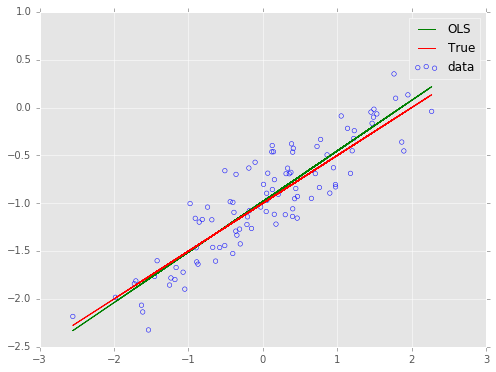

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     421.1
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           2.96e-37
Time:                        13:04:17   Log-Likelihood:                -6.0443
No. Observations:                 100   AIC:                             16.09
Df Residuals:                      98   BIC:                             21.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9812      0.026    -37.722      0.0

In [49]:
#(a) # create a random sample vector from N(0,1) distribution
np.random.seed(0)
x = np.random.randn(100)

#(b) create a noise term eps of samples drawn from N(0,0.25)
eps = 0.25*np.random.randn(100)

#(c) create a response variable y and print some info about the response
y = -1 + 0.5*x + eps
print("y has",len(y),'elements and the population regression line parameters are [beta0,beta1] = [-1,0.5]')

#(d) plot the simulated data
fix, ax = plt.subplots(figsize=(8,6));
ax.scatter(x,y, facecolors = 'none', edgecolors = 'b', label='data');

#(e) create a model and fit and comment about the fit
X = sm.add_constant(x)
model = sm.OLS(y,X)
est = model.fit()

#(f) plot the estimate and population regression lines
ax.plot(x, est.fittedvalues, 'g', label='OLS');
ax.plot(x, -1+0.5*x, 'r', label='True')
ax.legend(loc='best');
plt.show()

# print summary
print(est.summary())
print("The RSE is ", (est.ssr/(len(x)-X.shape[1]-1))**0.5)

#### The true $\left[\beta_0,\beta_1\right]$ was $[-1,0.5]$. Our model estimate $\left[\hat{\beta_0},\hat{\beta_1}\right]$ is $\left[-0.981,0.529\right]$. The standard error is low relative to the coeffecient and thus the confidence intervals are small so the coeffecient estimates are good.

## Fit Quadratic Model to Simulated Data

In [50]:
# (g) fit polynomial regression using x^2 

# create new design matrix with x^2 column
x_squared = x**2
X = np.concatenate((X,x_squared.reshape(len(x),1)),axis=1)

quadratic_model = sm.OLS(y,X)
quadratic_est = quadratic_model.fit()
print(quadratic_est.summary())
print("The RSE is ", (quadratic_est.ssr/(len(x)-X.shape[1]-1))**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     210.2
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           5.44e-36
Time:                        13:05:33   Log-Likelihood:                -5.6904
No. Observations:                 100   AIC:                             17.38
Df Residuals:                      97   BIC:                             25.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.9643      0.033    -29.173      0.0

#### Notice that the R-squared improved slightly (it always will) but the RSE increased. The RSE accounts for the added degrees of freedom. In the quadratic model we have added an extra degree of freedom and this causes an increase in the residual error even though the RSS has decreased. Also note the p-value indicates that the coeffecient of the squared term is not significant.

## Examine Error Term Variance on Confidence Interval

In [52]:
# make a model with lower variance in the error term

np.random.seed(0)
x = np.random.randn(100)

# create a noise term eps of samples drawn from N(0,0.1)
eps_low = 0.1*np.random.randn(100)

# create a response variable y
y_low = -1 + 0.5*x + eps_low

# Construct linear estimate for low variance error model
X = sm.add_constant(x)
model_low = sm.OLS(y_low,X)
est_low = model_low.fit()
print('With Var(epsilon) = 0.1, the confidence interval for beta is', est_low.conf_int())

# create a noise term eps of samples drawn from N(0,0.1)
eps_high = 0.5*np.random.randn(100)
# create a response variable y
y_high = -1 + 0.5*x + eps_high
model_high = sm.OLS(y_high,X)
est_high = model_high.fit()
est_high.conf_int()
print('With Var(epsilon) = 0.5, the confidence interval for beta is', est_high.conf_int())

With Var(epsilon) = 0.1, the confidence interval for beta is [[-1.01313217 -0.97183721]
 [ 0.49101981  0.53191987]]
With Var(epsilon) = 0.5, the confidence interval for beta is [[-1.12707658 -0.93645563]
 [ 0.44154891  0.63034698]]


### In the low error term variance model we have a very narrow confidence interval. In the original model we had wider confidence intervals. In the highest variance model we have the widest confidence intervals. Recall the confidence interval is: $\beta \pm t_{\alpha/2,n-2} \frac{SE}{\sqrt{n}}$ As SE increases (due to increased var(epsilon) the confidence interval widens.